# Batch versus online

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')
plt.rc('legend', fontsize=15)    
plt.rc('axes', titlesize=15, labelsize=15)
plt.rc('xtick', labelsize=13)   
plt.rc('ytick', labelsize=13) 

In [3]:
from sklearn import exceptions
import warnings

warnings.filterwarnings(action='ignore', category=exceptions.ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

## Higgs

We'll be using the Higgs dataset available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS). The task is to perform binary classification in order to determine if a signal produces Higgs bosons or not. The dataset contains 11.000.000 rows and has 28 numeric features.

In [5]:
import pandas as pd

X = pd.read_csv('HIGGS.csv.gz', header=None)
y = X.pop(0)

X = X.to_numpy()
y = y.to_numpy()

In [4]:
from sklearn import linear_model
from sklearn import pipeline
from sklearn import preprocessing

batch = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(solver='sag')
)

online = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.SGDClassifier(loss='log', max_iter=1, tol=1e-3)
)

Split train from test observations.

In [6]:
X_train, X_test = X[:-500_000], X[-500_000:]
y_train, y_test = y[:-500_000], y[-500_000:]

Let's record the score of each model for different sample sizes.

In [7]:
import time
import numpy as np
from sklearn import metrics

batch_times = {}
batch_scores = {}
online_times = {}
online_scores = {}

for train_size in np.logspace(0.5, 1, 100, base=len(X_train), dtype=int)[1:]:
    
    tic = time.time()
    batch.fit(X_train[:train_size], y_train[:train_size])
    batch_times[train_size] = time.time() - tic
    y_pred = batch.predict_proba(X_test)[:, 1]
    batch_scores[train_size] = metrics.roc_auc_score(y_test, y_pred)
    
    tic = time.time()
    online.fit(X_train[:train_size], y_train[:train_size])
    online_times[train_size] = time.time() - tic
    y_pred = online.predict_proba(X_test)[:, 1]
    online_scores[train_size] = metrics.roc_auc_score(y_test, y_pred)

Plot the test set score for every training sample size.

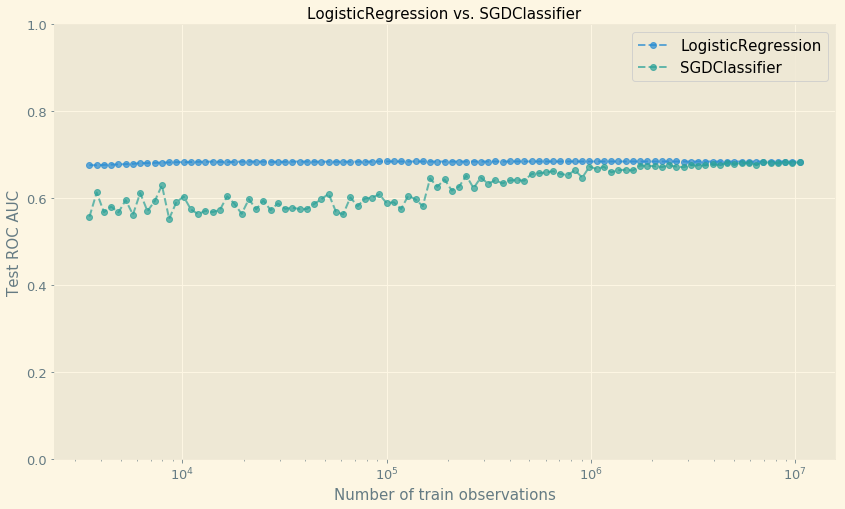

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(batch_scores.keys(), batch_scores.values(), alpha=0.7, marker='o', linestyle='dashed', label='LogisticRegression')
ax.plot(online_scores.keys(), online_scores.values(), alpha=0.7, marker='o', linestyle='dashed', label='SGDClassifier')
ax.set_title('LogisticRegression vs. SGDClassifier')
ax.set_xscale('log')
ax.set_ylim(0, 1)
ax.grid(True)
ax.set_xlabel('Number of train observations')
ax.set_ylabel('Test ROC AUC')
ax.legend();

Plot the training time for every training sample size.

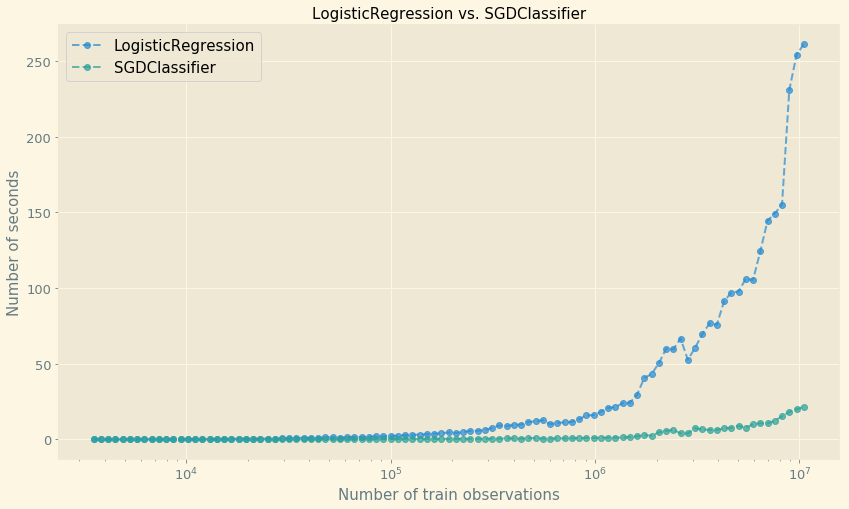

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(batch_times.keys(), batch_times.values(), alpha=0.7, marker='o', linestyle='dashed', label='LogisticRegression')
ax.plot(online_times.keys(), online_times.values(), alpha=0.7, marker='o', linestyle='dashed', label='SGDClassifier')
ax.set_title('LogisticRegression vs. SGDClassifier')
ax.set_xscale('log')
ax.grid(True)
ax.set_xlabel('Number of train observations')
ax.set_ylabel('Number of seconds')
ax.legend();

Show the score and the training time when the entire training set is used.

In [12]:
print(f'Batch final ROC AUC is {list(batch_scores.values())[-1]:.5f} in {round(list(batch_times.values())[-1])} seconds')
print(f'Online final ROC AUC is {list(online_scores.values())[-1]:.5f} in {round(list(online_times.values())[-1])} seconds')

Batch final ROC AUC is 0.68446 in 261 seconds
Online final ROC AUC is 0.68298 in 22 seconds


# Covertype

In [4]:
from sklearn import datasets

X, y = datasets.fetch_covtype(return_X_y=True)

In [5]:
from sklearn import linear_model
from sklearn import pipeline
from sklearn import preprocessing


batch = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(solver='sag', multi_class='auto')
)

online = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.SGDClassifier(loss='log', max_iter=1, tol=1e-3)
)

In [6]:
X_train, X_test = X[:-100_000], X[-100_000:]
y_train, y_test = y[:-100_000], y[-100_000:]

In [7]:
import time
import numpy as np
from sklearn import metrics

batch_times = {}
batch_scores = {}
online_times = {}
online_scores = {}

for train_size in np.logspace(0.5, 1, 100, base=len(X_train), dtype=int)[1:]:
    
    tic = time.time()
    batch.fit(X_train[:train_size], y_train[:train_size])
    batch_times[train_size] = time.time() - tic
    y_pred = batch.predict(X_test)
    batch_scores[train_size] = metrics.accuracy_score(y_test, y_pred)
    
    tic = time.time()
    online.fit(X_train[:train_size], y_train[:train_size])
    online_times[train_size] = time.time() - tic
    y_pred = online.predict(X_test)
    online_scores[train_size] = metrics.accuracy_score(y_test, y_pred)

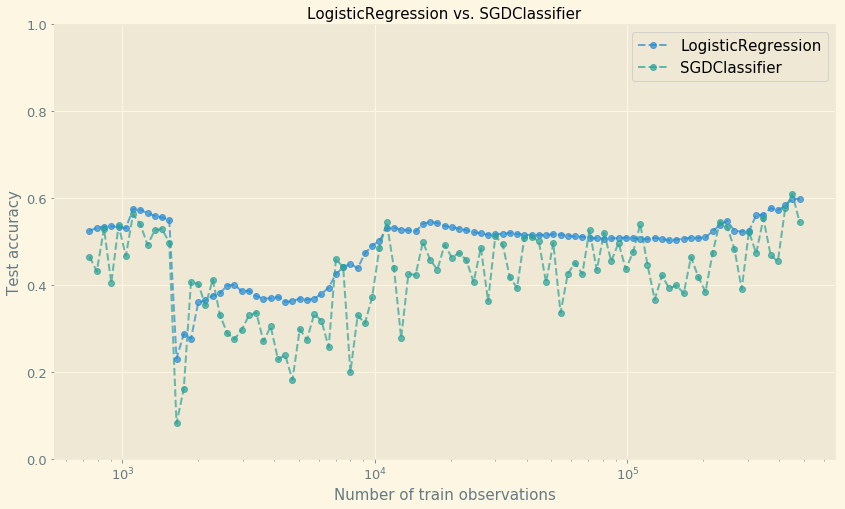

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(batch_scores.keys(), batch_scores.values(), alpha=0.7, marker='o', linestyle='dashed', label='LogisticRegression')
ax.plot(online_scores.keys(), online_scores.values(), alpha=0.7, marker='o', linestyle='dashed', label='SGDClassifier')
ax.set_title('LogisticRegression vs. SGDClassifier')
ax.set_xscale('log')
ax.set_ylim(0, 1)
ax.grid(True)
ax.set_xlabel('Number of train observations')
ax.set_ylabel('Test accuracy')
ax.legend();

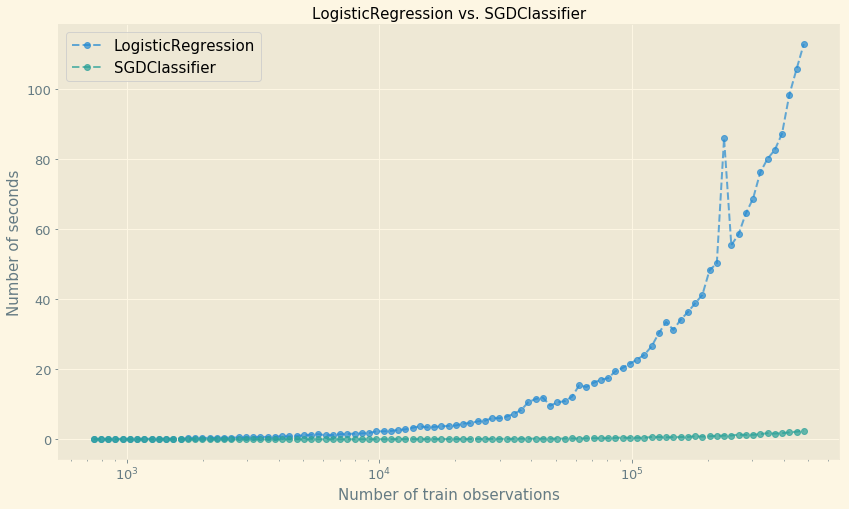

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(batch_times.keys(), batch_times.values(), alpha=0.7, marker='o', linestyle='dashed', label='LogisticRegression')
ax.plot(online_times.keys(), online_times.values(), alpha=0.7, marker='o', linestyle='dashed', label='SGDClassifier')
ax.set_title('LogisticRegression vs. SGDClassifier')
ax.set_xscale('log')
ax.grid(True)
ax.set_xlabel('Number of train observations')
ax.set_ylabel('Number of seconds')
ax.legend();

# California housing

In [10]:
from sklearn import datasets

X, y = datasets.fetch_california_housing(return_X_y=True)

In [11]:
from sklearn import linear_model
from sklearn import pipeline
from sklearn import preprocessing


batch = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.LinearRegression()
)

online = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    linear_model.SGDRegressor(max_iter=1, tol=1e-3)
)

In [12]:
X_train, X_test = X[:-2_000], X[-2_000:]
y_train, y_test = y[:-2_000], y[-2_000:]

In [14]:
import time
import numpy as np
from sklearn import metrics

batch_times = {}
batch_scores = {}
online_times = {}
online_scores = {}

for train_size in np.logspace(0.5, 1, 100, base=len(X_train), dtype=int)[1:]:
    
    tic = time.time()
    batch.fit(X_train[:train_size], y_train[:train_size])
    batch_times[train_size] = time.time() - tic
    y_pred = batch.predict(X_test)
    batch_scores[train_size] = metrics.mean_absolute_error(y_test, y_pred)
    
    tic = time.time()
    online.fit(X_train[:train_size], y_train[:train_size])
    online_times[train_size] = time.time() - tic
    y_pred = online.predict(X_test)
    online_scores[train_size] = metrics.mean_absolute_error(y_test, y_pred)

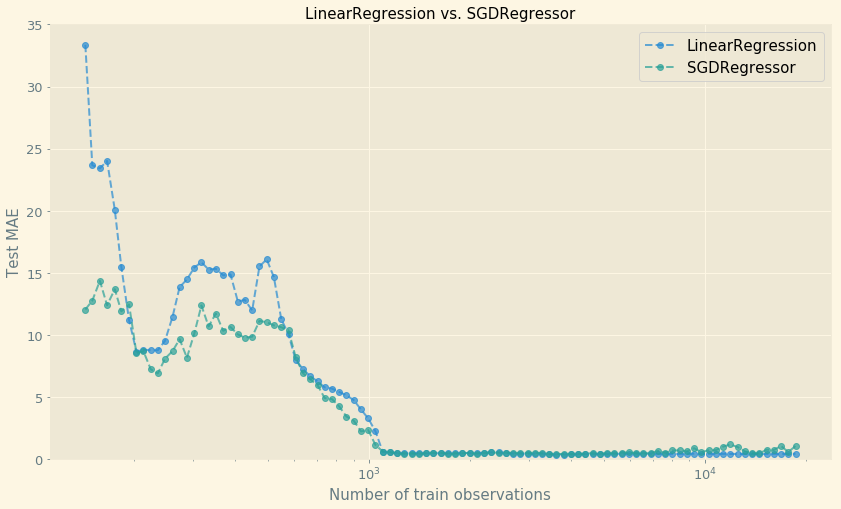

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(batch_scores.keys(), batch_scores.values(), alpha=0.7, marker='o', linestyle='dashed', label='LinearRegression')
ax.plot(online_scores.keys(), online_scores.values(), alpha=0.7, marker='o', linestyle='dashed', label='SGDRegressor')
ax.set_title('LinearRegression vs. SGDRegressor')
ax.set_xscale('log')
ax.set_ylim(0)
ax.grid(True)
ax.set_xlabel('Number of train observations')
ax.set_ylabel('Test MAE')
ax.legend();

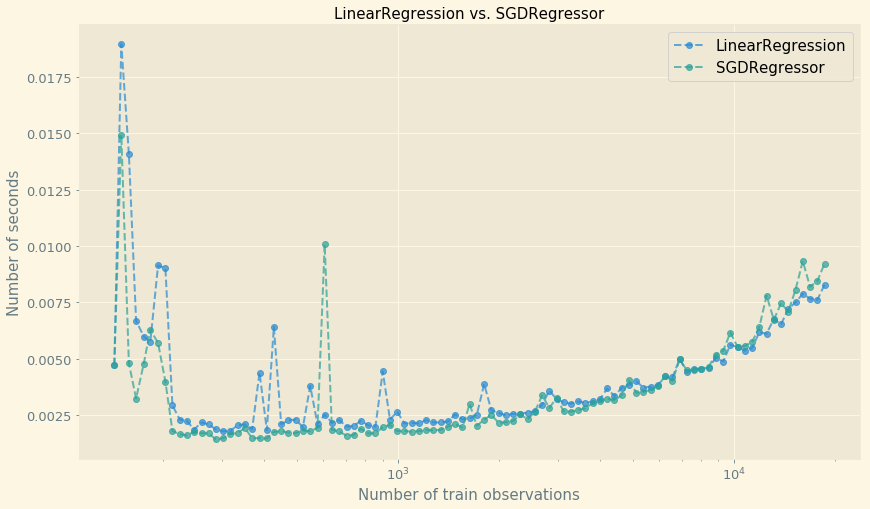

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(batch_times.keys(), batch_times.values(), alpha=0.7, marker='o', linestyle='dashed', label='LinearRegression')
ax.plot(online_times.keys(), online_times.values(), alpha=0.7, marker='o', linestyle='dashed', label='SGDRegressor')
ax.set_title('LinearRegression vs. SGDRegressor')
ax.set_xscale('log')
ax.grid(True)
ax.set_xlabel('Number of train observations')
ax.set_ylabel('Number of seconds')
ax.legend();